In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import signal

### Question 5 a)

Prove that $\sum_{x=0}^{N-1} e^{-2\pi i k x/N} = \frac{1-e^{-2\pi i k}}{1-e^{-2\pi i k/N}}$ 

$\sum_{x=0}^{N-1} e^{-2\pi i k x/N} = \sum (e^{-2\pi i k/N})^x$

Sum of geometric series: $ \sum_{x=0}^{N-1} ar^x = a(\frac{1-r^N}{1-r})$, where $r = e^{-2\pi i k/N}$

$a(\frac{1-r^N}{1-r}) = \frac{1-(e^{-2\pi i k/N})^N}{1-e^{-2\pi i k/N}}$

$ = \frac{1-e^{-2\pi i k}}{1-e^{-2\pi i k/N}}$

$ = \sum_{x=0}^{N-1} e^{-2\pi i k x/N} $

### Question 5 b)

$lim_{k->0} = \frac{1-e^{-2\pi ik}}{1-e^{-2\pi ik/N}}$

"0/0", use Hopital's rule

$ = lim_{k->0} \frac{2\pi i e^{-2\pi ik}}{{2\pi i/N}e^{-2\pi ik/N}}$

$ = lim_{k->0} \frac{2\pi i e^{0}}{{2\pi i/N}e^{0}}$

$ = lim_{k->0} \frac{N 2\pi i e^{-2\pi ik}}{{2\pi i/N}e^{-2\pi ik}}$

$ = lim_{k->0} N $

$ = N $

Proving that it is equal to 0 for any integer k that isn't a multiple of N

$1-e^{-2\pi ik} = 1 - (cos(-2\pi k) + i sin(-2\pi k))$

$1-e^{-2\pi ik} = 1 - (cos(2\pi k) + i sin(2\pi k))$

For any integer k, this is 0 because $1-cos(2\pi n)+isin(2\pi n) = 1 - 1 + 0 = 1$ for every n (that belongs to the set of natural numbers)

Looking at two cases for integer values:

$\frac{1-e^{-2\pi ik}}{1-e^{-2\pi ik/N}} = \frac{0}{0} $ if k=nN

$\frac{1-e^{-2\pi ik}}{1-e^{-2\pi ik/N}} = \frac{0}{1-e^{-2\pi ik/N}} = 0$ if k is not equal to nN since $e^{-2\pi ik/N}$, where m is not an integer value

### Question 5 c)

First derive the fourier transform:

$sin(\omega x), \omega =2\pi f, f = k/N$

$sin(2\pi kx/N) = \frac{e^{2\pi kx/N} - e^{-2\pi kx/N}}{2i}$

$\sum {(\frac{e^{i\omega_k x} - e^{-i\omega_k x}}{2i})e^{-i\omega_l x}}$

$\sum {\frac{e^{i\omega_k x} - e^{-i\omega_l x}}{2i}} - \sum {\frac{e^{-i\omega_k x} - e^{-i\omega_l x}}{2i}}$

$ = \frac{1}{2i}(\sum e^{-2\pi x(l-k)/N} - \sum e^{-2\pi x(l+k)/N})$, let $k1 = l-k, k2 = l+k$

$ = \frac{1}{2i}(\sum e^{-2\pi xk1/N} - \sum e^{-2\pi xk2/N})$

$ = \frac{1}{2i}(\frac{1 - e^{-2\pi xk1}}{1 - e^{-2\pi xk1/N}} - \frac{1 - e^{-2\pi xk2}}{1 - e^{-2\pi xk2/N}})$

In [9]:
#Analytical DFT of non integer sine wave
#Take the solution derived above and code it now
i = np.complex(0,1)
def ftsin(k,N):
    #k1 = K-k
    #k2 = K+k
    #a = (1-np.exp(-2*np.pi*i*k1))/(1-np.exp(-2*np.pi*i*k1/N))
    #b = (1-np.exp(-2*np.pi*i*k2))/(1-np.exp(-2*np.pi*i*k2/N))
    #f = (1/(2*i))*(a-b)
    kVals=np.arange(N)

    summed = []
    for k_i in kVals:
        summed.append( 1/(2j) * (-np.sum(np.exp(-2j*np.pi*( k - k_i ) *x/N) + np.exp(-2j*np.pi*( k + k_i )*x/N) ) ) )
        
        
    return np.array(summed), kVals

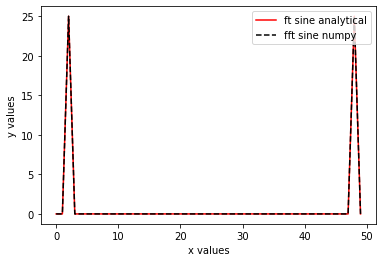

In [10]:
N = 50.0
x = np.arange(N)
k = 2.0
sinA = np.sin(2*np.pi*k*x/N)

sinfft = np.fft.fft(sinA)
ft, K = ftsin(k,N)

plt.plot(K,abs(ft),color='red',label='ft sine analytical')
plt.plot(abs(sinfft),'--',color='black',label='fft sine numpy')
plt.xlabel('x values')
plt.ylabel('y values')
plt.savefig('q5_sine_4')
plt.legend(loc='upper right')
plt.show()

2.0982941905970374e-14


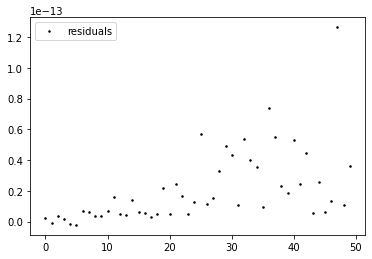

In [11]:
#Residuals
print(np.mean(abs(ft)-abs(sinfft)))
plt.plot(abs(ft)-abs(sinfft),'.',color='black',markersize=3,label='residuals')
plt.legend()
plt.show()

The peak we observe is almost like a delta function, but the peak has a small bandwith instead of a pure delta function. We observe spectral leakage.

The fft agrees within machine precision to the analytic derivation. 
Let's see what happens if we use a non-integer value for k this time:

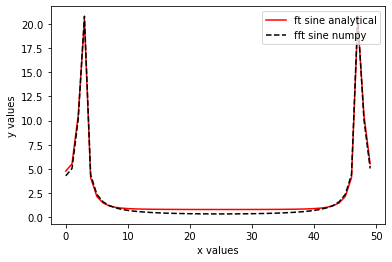

In [13]:
N = 50.0
x = np.arange(N)
k = 2.7
sinA = np.sin(2*np.pi*k*x/N)

sinfft = np.fft.fft(sinA)
ft, K = ftsin(k,N)

plt.plot(K,abs(ft),color='red',label='ft sine analytical')
plt.plot(abs(sinfft),'--',color='black',label='fft sine numpy')
plt.xlabel('x values')
plt.ylabel('y values')
plt.savefig('q5_sine_4')
plt.legend(loc='upper right')
plt.show()

0.24573721321702025


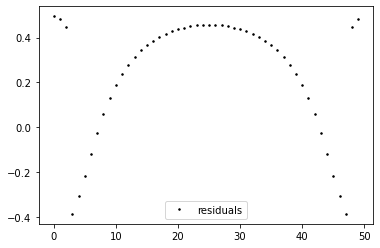

In [14]:
#Residuals
print(np.mean(abs(ft)-abs(sinfft)))
plt.plot(abs(ft)-abs(sinfft),'.',color='black',markersize=3,label='residuals')
plt.legend()
plt.show()
#Angry residuals >.< 

### Question 5 d)

In [5]:
def fftsin_window(x,w):
    N = len(x)
    f = np.sin(2*np.pi*k*x/N)*w
    summed = np.zeros(N)
    kvec = np.arange(N)
    i = np.complex(0,1)
    for i in range(N):
        summed[i] = np.sum(f*np.exp(-2*np.pi*i*kvec[i]*x/N))
    return summed

#Define window function
def window(x,N):
    return 0.5-0.5*np.cos(2*np.pi*x/N)

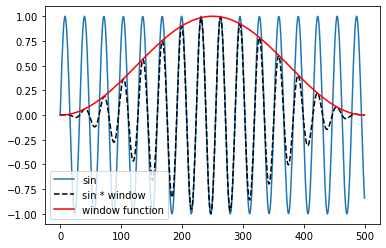

In [6]:
N = 500
x = np.arange(N)
k = 15.69
w = window(x,N)
y = fftsin_window(x,w)
s = np.sin(2*np.pi*k*x/len(x))
plt.plot(x,s,label='sin')
plt.plot(x,s*w,'--',color='black',label='sin * window')
plt.plot(x,w,'-',color='red',label='window function')
plt.legend()
plt.savefig('q5_window_function_1')
plt.show()

Now we fourier transform this:

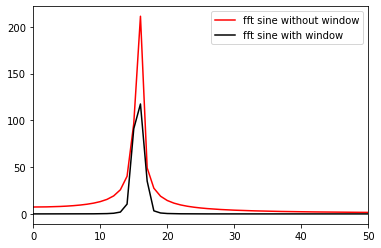

In [7]:
ft = np.fft.fft(s)
ft_window = np.fft.fft(s*window(x,N))
plt.plot(np.abs(ft),'-',color='red',label='fft sine without window')
plt.plot(np.abs(ft_window),'-',color='black',label='fft sine with window')
plt.legend()
plt.xlim(0,50)
plt.savefig('q5_window_function_3')
plt.show()

We can see that the spectral leakage drops significantly.

### Question 5 e)

In [8]:
#win = np.fft.fft(window(x,N))

i = np.complex(0,1)
def func(k,N):
    K = np.arange(N)
    k1 = K-1
    k2 = 1
    ph = np.pi/2
    a = (1-np.exp(-2*np.pi*i*K))/(1-np.exp(-2*np.pi*i*K/N))
    b = (1-np.exp(-2*np.pi*i*k1))/(1-np.exp(-2*np.pi*i*k1/N))
    c = (1-np.exp(-2*np.pi*i*k2))/(1-np.exp(-2*np.pi*i*k2/N))
    
    f = (0.5)*(a) - (0.5*np.e**(i*ph)/(2*i))*(b) + (0.5*np.e**(i*ph)/(2*i))*(c)
    return (f/len(f)).real

N = 500
k = 1
f = func(k,N)

#plt.plot(np.abs(f),'-',color='black',label='fft window')
#plt.legend()
#plt.savefig('q5_window_function_2')
#plt.show()

<ipython-input-8-bf1b36115c97>:9: RuntimeWarning: invalid value encountered in true_divide
  a = (1-np.exp(-2*np.pi*i*K))/(1-np.exp(-2*np.pi*i*K/N))
<ipython-input-8-bf1b36115c97>:10: RuntimeWarning: invalid value encountered in true_divide
  b = (1-np.exp(-2*np.pi*i*k1))/(1-np.exp(-2*np.pi*i*k1/N))


By looking at the result from part b), we can see that at k=0, we only get the first term in the fft to stay (the one with N/2). The other two terms survive when the k is -1 and 1, resulting in the +/- N/4 terms (since the limit tends to N as k -> 0).

We end up with something like:

$(window*f)$

$(0.5*N*\delta(k) - N/4\delta(k-1) + N/4\delta(k+1))*F(k)$

And then for every value of k, one of these terms is expressed, which is why you would see a spike at every +/- N/4 and N/2.